## PANDAS DATA CLEANING PROJECT

In [1]:
# Import Necesarry Modules
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
# Data Reading
data = pd.read_excel(r'online_retail_II.xlsx')

In [28]:
# File Output Names
date = (dt.datetime.today()).strftime('%m-%d-%Y')
file_name = {0 : f'Retail_Data_Cleaned_{date}.', 1 : f'Exploratory_Data_{date}'}

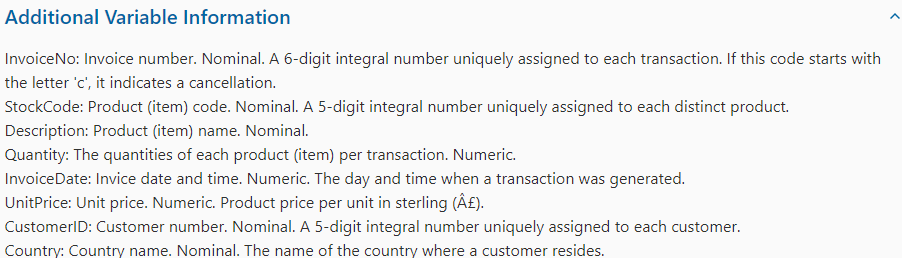

#### Data Cleaning Process

In [31]:
class Retail():
    def __init__(self, data):
        self.data = data

    def clean_data(self, invoice_len=6, stock_len=5):                                    
        data = self.data.copy()
        data.drop_duplicates(inplace=True)                                              # Dropping Duplicated Rows
        data.dropna(subset='Customer ID', inplace=True)                                 # Customers must be identifiable thus all customers have their unique ID's

        data = data.astype({'Customer ID' : 'Int16', 'Invoice' : 'string'})             # Adjusting data types for more extensive data cleaning

        data['Invoice'] = data['Invoice'].replace(' ', '', regex=True)                  # Excluding prefixes on Invoice with values [nan, 'C', 'A'] having exact length of 6
        data = data[data['Invoice'].str.len() == invoice_len]

        data = data[data['Price'] > 0.2]                                                # Not including values <= 0 since negative values and 0 values may for misconceptions on 
                                                                                        # further data analysis. Also, I adjusted a limit of 0.2 for the price to adjust skewness and prevent outliers

        data['StockCode'] = data['StockCode'].replace('[A-Za-z]', '', regex=True)       # Based on preliminary information the code only contains 5 digit numerical value so I filter out any strings on it.
        data = data[data['StockCode'].str.len() == stock_len]

        return data                                                                     # Returns clean data
    
    def save_file(self, data, file):
        file_type = input('Enter file type: (excel or csv)').lower()                    # Asks for user input for file type of the data to be save

        if file_type == 'excel':                                                        # Concatenates appropriate excel file format
            file = file + 'xlsx'
        if file_type == 'csv':                                                          # Concatenates appropriate csv file format
            file = file + 'csv'

        return data.to_excel(file, index=False)                                         # Saves file to local directory with corresponding present date

raw = Retail(data)                                                                      # Initializes class into variable
data = raw.clean_data()                                                                 # Access methods from the class

In [32]:
raw.save_file(data, file_name[0])                                                       # Saves a dataframe on local directory